In [1]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

In [3]:
df=pd.read_csv(r"D:\datasets\spam.csv",encoding="latin-1")

In [4]:
df=df.drop({'Unnamed: 2','Unnamed: 3','Unnamed: 4'},axis=1)

In [5]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
ham_data=df.loc[df['v1']=='ham']
ham_data=ham_data['v2']

In [7]:
spam_data=df.loc[df['v1']=='spam']

In [8]:
spam_data=spam_data['v2']

In [9]:
len(ham_data),len(spam_data)

(4825, 747)

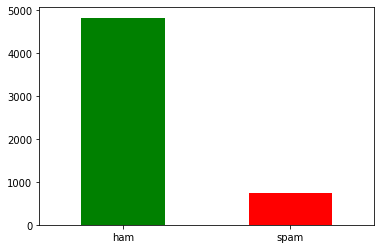

In [10]:
df.v1.value_counts().plot.bar(rot=0,color=['g','r'])
plt.show()

In [11]:
spam_para=''
for i in spam_data:
    spam_para+=i+'.'

In [20]:
custom_mask = np.array(Image.open(r'D:\datasets\cloud.png')) 
stopwords = set(STOPWORDS)

In [21]:
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               mask = custom_mask,
               )

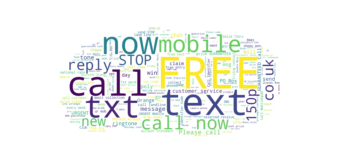

In [22]:
#%matplotlib qt
wc.generate(spam_para)
image_colors = ImageColorGenerator(custom_mask)
plt.axis('off')
plt.imshow(wc,interpolation = 'bilinear')
plt.show()

In [23]:
ham_para=''
for i in ham_data:
    ham_para+=i+'.'

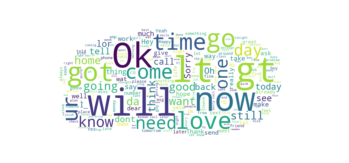

In [24]:
wc.generate(ham_para)
image_colors = ImageColorGenerator(custom_mask)
plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear')

In [25]:
spam_list=[]
for i in spam_data:
    spam_list.append(i)

In [26]:
ham_list=[]
for i in ham_data:
    ham_list.append(i)

In [27]:
d={}
for i in spam_list:
    a=i.lower()
    a=a.split(' ')
    for j in a:
        if j in stopwords:
            continue
        if j.isdigit():
            continue
        if j in d:
            d[j]+=1
        else:
            d[j]=1

In [28]:
#percentage of Digits in Message
def Digits(msg):
    counter=0
    for i in msg:
        if i.isdigit():
            counter+=1
    return (counter/len(msg))*100

In [29]:
df['percentage_digits']=df['v2'].apply(Digits)

In [30]:
df.head()

,v1,v2,percentage_digits
0,ham,"Go until jurong point, crazy.. Available only ...",0.000000
1,ham,Ok lar... Joking wif u oni...,0.000000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032
3,ham,U dun say so early hor... U c already then say...,0.000000
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.000000


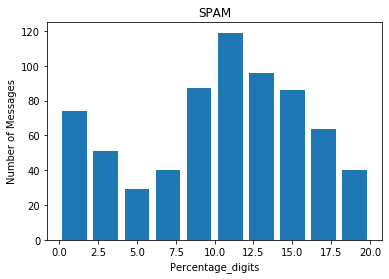

In [31]:
plt.hist(df[df['v1'] == 'spam']['percentage_digits'], bins=10, range=(0, 20), rwidth=0.8)
plt.title("SPAM")
plt.xlabel('Percentage_digits')
plt.ylabel('Number of Messages')
plt.savefig("D:/datasets/spam_digit.png")

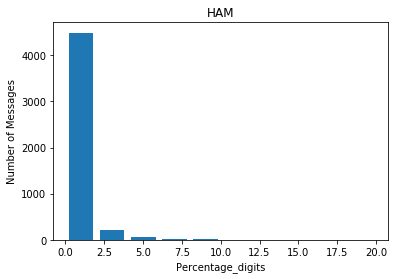

In [32]:
plt.hist(df[df['v1'] == 'ham']['percentage_digits'], bins=10, range=(0, 20), rwidth=0.8)
plt.title("HAM")
plt.xlabel('Percentage_digits')
plt.ylabel('Number of Messages')
plt.savefig("D:/datasets/ham_digit.png")

In [33]:
def caps(msg):
    counter=0
    for i in msg:
        if i.isupper():
            counter+=1
    return (counter/len(msg))*100

In [34]:
df['percentage_caps']=df['v2'].apply(caps)

In [35]:
def emotes(text):
    return int(':)' in text or ':(' in text or ':-)' in text or ':=D' in text or ':D' in text or ':P' in text)

In [36]:
df['contains_emotes']=df['v2'].apply(emotes)

In [37]:
df[df['contains_emotes']==1]

,v1,v2,percentage_digits,percentage_caps,contains_emotes
16,ham,Oh k...i'm watching here:),0.0,3.846154,1
73,ham,K..k:)where are you?how did you performed?,0.0,2.380952,1
77,ham,I like you peoples very much:) but am very shy...,0.0,2.000000,1
129,ham,K..k:)how much does it cost?,0.0,3.571429,1
161,ham,New car and house for my parents.:)i have only...,0.0,1.562500,1
...,...,...,...,...,...
5475,ham,Dhoni have luck to win some big title.so we wi...,0.0,1.851852,1
5485,ham,Also fuck you and your family for going to rho...,0.0,1.481481,1
5498,ham,Why did I wake up on my own &gt;:(,0.0,5.882353,1
5517,ham,Miles and smiles r made frm same letters but d...,0.0,1.807229,1


In [38]:
l=[(k, v) for k, v in d.items()] 

In [39]:
dd=sorted(d.items(), key = lambda kv:(kv[1], kv[0]))

In [40]:
d1=dd[-20:]

In [41]:
x_val=[i[0] for i in d1]
y_val=[i[1] for i in d1]

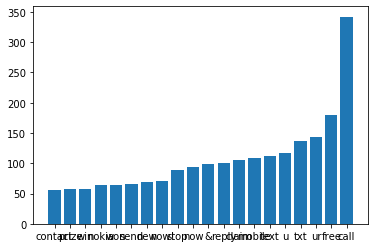

In [42]:
plt.bar(x_val,y_val)
plt.show()

In [43]:
punctuations = '''!()-[]{};:'"+\,<>./?@#$%^&*_~0123456789'''
punctles_spam=[]
for i in spam_list:
    no_punct = " "
    for i in i:
        if i not in punctuations:
            no_punct=no_punct+i
    punctles_spam.append(no_punct)

In [44]:
punctuations = '''!()-[]{};:'"+\,<>./?@#$%^&*_~0123456789'''
punctles_ham=[]
for i in ham_list:
    no_punct = " "
    for i in i:
        if i not in punctuations:
            no_punct=no_punct+i
    punctles_ham.append(no_punct)

In [45]:
from spellchecker import SpellChecker
spell=SpellChecker()
co=[]
count=0
for i in punctles_spam:
    count+=1
    a=i.split()
    mis=spell.unknown(a)
    co.append((len(mis)/len(a))*100)

In [46]:
#Word Cloud for Slang_words
alpha=''
mis_spamwords=[]
for i in punctles_spam:
    a=i.split()
    mis=spell.unknown(a)
    mis_spamwords.append(mis)
for i in mis_spamwords:
    for j in i: 
        alpha+=j+' '

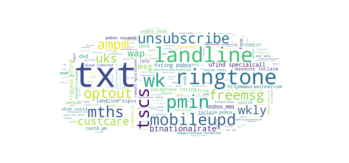

In [47]:
wc.generate(alpha)
image_colors = ImageColorGenerator(custom_mask)
plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear')

In [48]:
spell=SpellChecker()
co1=[]
count=0
for i in co1:
    count+=1
    a=i.split()
    mis=spell.unknown(a)
    co1.append((len(mis)/len(a))*100)

In [49]:
#percentage of dots in spam and ham
def dots(msg):
    count=0
    for i in msg:
        if i=='.':
            count+=1
    return((count/len(msg))*100)

In [50]:
df['percentage_dots']=df['v2'].apply(dots)

In [51]:
df[df['v1']=='spam']

,v1,v2,percentage_digits,percentage_caps,contains_emotes,percentage_dots
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,6.451613,0,0.645161
5,spam,FreeMsg Hey there darling it's been 3 week's n...,2.702703,4.729730,0,0.675676
8,spam,WINNER!! As a valued network customer you have...,12.025316,7.594937,0,1.898734
9,spam,Had your mobile 11 months or more? U R entitle...,8.441558,9.090909,0,0.000000
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",16.176471,12.500000,0,0.735294
...,...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,23.333333,18.888889,0,0.000000
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,8.750000,65.000000,0,3.125000
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1.250000,12.500000,0,1.875000
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,3.401361,9.523810,0,0.680272


In [52]:
#percentage of exclamations
def exclam(msg):
    count=0
    for i in msg:
        if i=='!':
            count+=1
    return((count/len(msg))*100)

In [53]:
df['percentage_exclams']=df['v2'].apply(exclam)

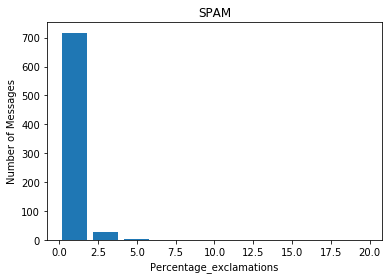

In [54]:
plt.hist(df[df['v1'] == 'spam']['percentage_exclams'], bins=10, range=(0, 20), rwidth=0.8)
plt.title("SPAM")
plt.xlabel('Percentage_exclamations')
plt.ylabel('Number of Messages')
plt.savefig('D:\datasets\spam-exclams.png')

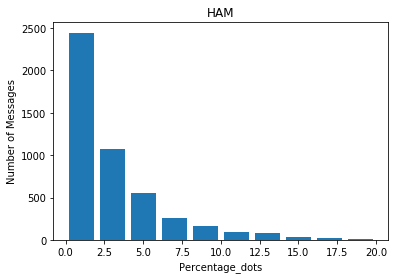

In [55]:
plt.hist(df[df['v1'] == 'ham']['percentage_dots'], bins=10, range=(0, 20), rwidth=0.8)
plt.title("HAM")
plt.xlabel('Percentage_dots')
plt.ylabel('Number of Messages')
plt.savefig('D:\datasets\ham-dots.png')

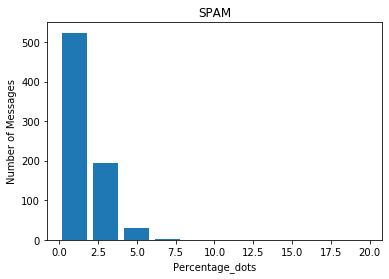

In [56]:
plt.hist(df[df['v1'] == 'spam']['percentage_dots'], bins=10, range=(0, 20), rwidth=0.8)
plt.title("SPAM")
plt.xlabel('Percentage_dots')
plt.ylabel('Number of Messages')
plt.savefig('D:\datasets\spam-dots.png')

In [57]:
def msgcount(msg):
    return(len(msg))

In [58]:
df['msg_count']=df['v2'].apply(msgcount)

In [59]:
from statistics import median
median(df[df['v1']=='ham']['msg_count'])

52

In [60]:
from statistics import median
median(df[df['v1']=='spam']['msg_count'])

149

In [61]:
df.describe()

,percentage_digits,percentage_caps,contains_emotes,percentage_dots,percentage_exclams,msg_count
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,1.916136,6.637450,0.055815,3.061335,0.272271,80.118808
std,4.922491,10.909398,0.229584,5.069458,0.860300,59.690841
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,2.597403,0.000000,0.000000,0.000000,36.000000
50%,0.000000,3.846154,0.000000,1.869159,0.000000,61.000000
75%,0.666667,6.250000,0.000000,3.846154,0.000000,121.000000
max,100.000000,100.000000,1.000000,60.000000,14.814815,910.000000
